In [184]:
import numpy as np
import matplotlib.pyplot as plt

In [185]:
class LineSegment:
    def __init__(self, midpoint=None, slope=None, left_endpoint=None, right_endpoint=None):
        if midpoint is not None and slope is not None:
            # 根据中点和斜率初始化
            self.midpoint = midpoint
            self.slope = slope
            self.calculate_endpoints()
            self.calculate_length()
        elif left_endpoint is not None and slope is not None:
            # 根据左端点和斜率初始化
            self.endpoint1 = left_endpoint
            self.slope = slope
            self.calculate_midpoint_and_right_endpoint()
            self.calculate_length()
        elif right_endpoint is not None and slope is not None:
            # 根据右端点和斜率初始化
            self.endpoint2 = right_endpoint
            self.slope = slope
            self.calculate_midpoint_and_left_endpoint()
            self.calculate_length()
        else:
            raise ValueError("Invalid arguments. Please provide either midpoint and slope, left_endpoint and slope, or right_endpoint and slope.")

    def calculate_endpoints(self):
        # 根据中点和斜率计算两端点坐标
        x_mid, y_mid = self.midpoint
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x1 = x_mid - delta_x
        y1 = y_mid - self.slope * delta_x
        x2 = x_mid + delta_x
        y2 = y_mid + self.slope * delta_x

        self.endpoint1 = (x1, y1)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_right_endpoint(self):
        # 根据左端点和斜率计算中点和右端点
        x1, y1 = self.endpoint1
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x1 + delta_x
        y_mid = y1 + self.slope * delta_x
        x2 = x1 + 2 * delta_x
        y2 = y1 + 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_left_endpoint(self):
        # 根据右端点和斜率计算中点和左端点
        x2, y2 = self.endpoint2
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x2 - delta_x
        y_mid = y2 - self.slope * delta_x
        x1 = x2 - 2 * delta_x
        y1 = y2 - 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint1 = (x1, y1)

    def calculate_length(self):
        # 计算直线段的长度
        length = ((self.endpoint2[0] - self.endpoint1[0])**2 +
                  (self.endpoint2[1] - self.endpoint1[1])**2)**0.5
        self.length = length

    def get_endpoints(self):
        return self.endpoint1, self.endpoint2

    def get_midpoint(self):
        return self.midpoint

    def get_slope(self):
        return self.slope
    
    def intercept(self):
        return self.midpoint[1] - self.slope * self.midpoint[0]


In [186]:
def updateLeft(line_segments_array, index, slope):
    # 确保索引有效
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]

    left_endpoint = existing_line.get_endpoints()[1]

    new_line = LineSegment(left_endpoint=left_endpoint, slope=slope)

    line_segments_array.insert(index + 1, new_line)

def updateRight(line_segments_array, index, slope):
    # 确保索引有效
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]

    right_endpoint = existing_line.get_endpoints()[0]

    new_line = LineSegment(right_endpoint=right_endpoint, slope=slope)

    line_segments_array.insert(index + 1, new_line)

In [187]:

def plot_line_segments(line_segments, fig=None, ax=None):
    # 如果没有传递 fig 和 ax，则创建一个新的图形和子图对象
    if fig is None or ax is None:
        fig, ax = plt.subplots()

    # 遍历 LineSegment 列表，绘制每一条线段
    for line_segment in line_segments:
        # 获取端点坐标
        endpoints = line_segment.get_endpoints()
        x_values = [endpoints[0][0], endpoints[1][0]]
        y_values = [endpoints[0][1], endpoints[1][1]]

        # 绘制线段
        ax.plot(x_values, y_values , linestyle='-', label=f'Slope: {line_segment.get_slope()}')

    # 添加标签和标题
    # ax.set_xlabel('X-axis')
    # ax.set_ylabel('Y-axis')
    # ax.set_title('Line Segments Plot')

    # 显示图例
    # ax.legend()

    # 如果在函数内部创建了新的图形和子图对象，则显示图形
    if fig is None or ax is None:
        plt.show()

    # 返回图形和子图对象的引用，以便进一步操作（可选）
    return fig, ax


def print_line_segments(line_segments_array):
    for idx, line_segment in enumerate(line_segments_array, start=1):
        print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
        print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
        print(f"Line {idx} - Slope: {line_segment.get_slope()}")
        print(f"Line {idx} - intercept: {line_segment.intercept()}")


def lineplot(p1, p2, label=None):
    endpoints = (p1, p2)
    x_values = [endpoints[0][0], endpoints[1][0]]
    y_values = [endpoints[0][1], endpoints[1][1]]
    #ax.plot(x_values, y_values, marker='o', linestyle='-', label=label)
    ax.plot(x_values, y_values,  linestyle='-', label=label)




In [188]:
def reflect_slope(k1,k):
    return ((k*k-1)+2*k/k1)/(2*k-(k*k-1)/k1)

    
def reflect_simple(index,line_segments_array,tag,k1 = None):
    
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #k1 = 1000000000

    # 入射
    p1 = line_segments_array[index].get_midpoint()
    p2 = (- line_segments_array[index].get_midpoint()[1]/k1 + line_segments_array[index].get_midpoint()[0], 25)
    #print(f"xpoints: {p1} - ypoints: {p2}")
    lineplot(p1, p2, label=f'Slope: {line_segments_array[index].get_slope()}')
    

    # 反射
    slope = reflect_slope(k1,line_segments_array[index].get_slope())
    line = LineSegment(left_endpoint=line_segments_array[index].get_endpoints()[tag], slope=slope)
    p3 = (0, line.intercept())
    lineplot(p1, p3, label=f'Slope: {line_segments_array[index].get_slope()}')


def degree_incident_light_is(d):
    reflect_simple(0, line_segments_arrayR, 1, d)
    reflect_simple(0, line_segments_arrayL, 0, d)

    # for i in range(1, 15):
    #     reflect_simple(20 * i, line_segments_arrayR, 1, d)

    # for i in range(1, 15):
    #     reflect_simple(20 * i, line_segments_arrayL, 0, d)
    


In [189]:
def draw_circle(fig=None, ax=None):

    radius = 300
    center = (0, 0)
    theta = np.linspace(np.pi, 2 * np.pi, 1000)  # 修改theta的范围，只考虑下半圆周
    circle_x = radius * np.cos(theta) + center[0]
    circle_y = radius * np.sin(theta) + center[1]

    incident_angle = np.linspace(0, 2 * np.pi, 30)
    reflection_interval = [-np.pi/9, np.pi/9]

    ax.plot(circle_x, circle_y, label='Circle')

def circle_slope(index):
    k_value =  np.tan(index/300+1/600)
    return k_value


def find_line_segments_fit_circle(line_segments_arrayR,line_segments_arrayL):

    left_endpoint1 = (0, -300)
    slope1 = circle_slope(0)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = circle_slope(i)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)


    right_endpoint1 = (0, -300)
    slope1 = - circle_slope(0)
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = - circle_slope(i)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)

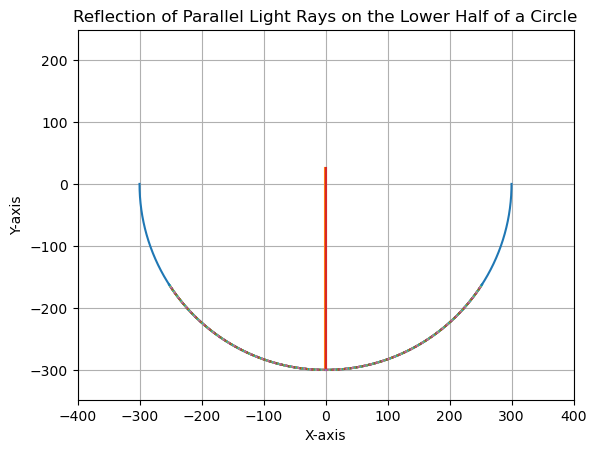

In [190]:
# circle
fig, ax = plt.subplots()


# draw a circle 
draw_circle(fig, ax)


# draw a bunch of  line segments to fit the circle 
line_segments_arrayR = []
line_segments_arrayL = []

find_line_segments_fit_circle(line_segments_arrayR,line_segments_arrayL)
    
# print_line_segments(line_segments_arrayR)
# print("###########################################################")
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(None)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

plt.title('Reflection of Parallel Light Rays on the Lower Half of a Circle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()


In [191]:
def parabola_slope(index, line_segments_array, tag, k1 = None):

    existing_line = line_segments_array[index-1]

    endpoint = existing_line.get_endpoints()[tag] # r1 l0
    x0 = endpoint[0]
    y0 = endpoint[1]
    y = -160
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #print(endpoint)
    k2 = (y0 - y)/x0
    b = (2 - 2/(k2*k1))/(1/k2 + 1/k1)
    k_value = (b + (b * b + 4) ** 0.5) / 2
    if (tag == 0):
        k_value = (b - (b * b + 4) ** 0.5) / 2
    return k_value


# def small_theta(dy, k1 = None):


def find_line_segments_like_parabola(line_segments_arrayR,line_segments_arrayL,degree = None):

    left_endpoint1 = (0, -300)
                                                                                #slope1 = circle_slope(0)
    slope1 = -0.0897
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayL, 1, degree)
        #print(slope_to_insert)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)

    #print("###########################################################")


    right_endpoint1 = (0, -300)
                                                                                #slope1 = - circle_slope(0)
    slope1 = -0.0018
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayR, 0, degree)
        #print(slope_to_insert)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)

Line 1 - Midpoint: (-0.49999919000196824, -299.999100001458)
Line 1 - Endpoints: ((-0.9999983800039365, -299.998200002916), (0, -300))
Line 1 - Slope: -0.0018
Line 1 - intercept: -300.0
Line 2 - Midpoint: (-1.4979369184224804, -299.95284350440033)
Line 2 - Endpoints: ((-1.9958754568410242, -299.9074870058846), (-0.9999983800039365, -299.998200002916))
Line 2 - Slope: -0.09108854811629641
Line 2 - intercept: -300.08928840346925
Line 3 - Midpoint: (-2.4936493264403072, -299.8603576652977)
Line 3 - Endpoints: ((-2.99142319603959, -299.8132283247108), (-1.9958754568410242, -299.9074870058846))
Line 3 - Slope: -0.09468022221584427
Line 3 - intercept: -300.0964569376535
Line 4 - Midpoint: (-3.489025938676679, -299.7643252520052)
Line 4 - Endpoints: ((-3.9866286813137677, -299.71542217929965), (-2.99142319603959, -299.8132283247108))
Line 4 - Slope: -0.09827733755327195
Line 4 - intercept: -300.10721743191266
Line 5 - Midpoint: (-4.4840538317950145, -299.6647445741006)
Line 5 - Endpoints: ((-

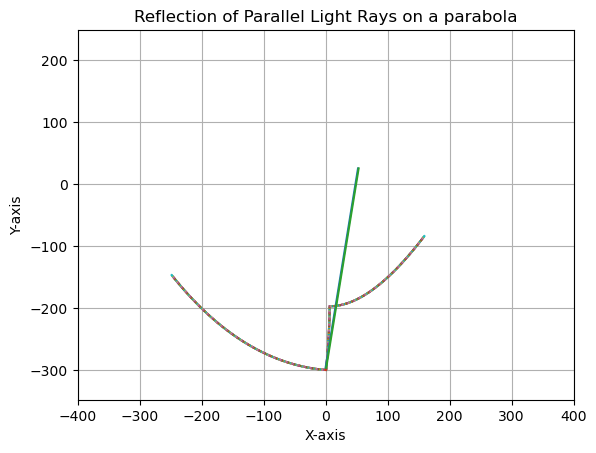

In [192]:
#parabola

fig, ax = plt.subplots()


# draw a bunch of  line segments like parabola, and the degree of incident light is None(90) or 80
line_segments_arrayR = []
line_segments_arrayL = []
find_line_segments_like_parabola(line_segments_arrayR, line_segments_arrayL, 80)
    
print_line_segments(line_segments_arrayR)
print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(80)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

# set the range
# plt.xlim(-25, 25)
# plt.ylim(-310, -250)

# plt.xlim(-10, 10)
# plt.ylim(-310, -290)

plt.title('Reflection of Parallel Light Rays on a parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()

In [193]:
intercept_array = []

def find_intercepts(line_segments_arrayR,line_segments_arrayL,intercept_array):
    k1 = float('inf')
    #k1 = 1000000000
    for i in range(0,300):
        slope = reflect_slope(k1,line_segments_arrayR[i].get_slope())
        line = LineSegment(left_endpoint=line_segments_arrayR[i].get_endpoints()[1], slope=slope)
        intercept_array.append(line.intercept())

    for i in range(0,300):
        slope = reflect_slope(k1,line_segments_arrayL[i].get_slope())
        line = LineSegment(left_endpoint=line_segments_arrayL[i].get_endpoints()[0], slope=slope)
        intercept_array.append(line.intercept())

find_intercepts(line_segments_arrayR,line_segments_arrayL,intercept_array)


C:\Users\18318\AppData\Local\Temp\ipykernel_23712\597294958.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


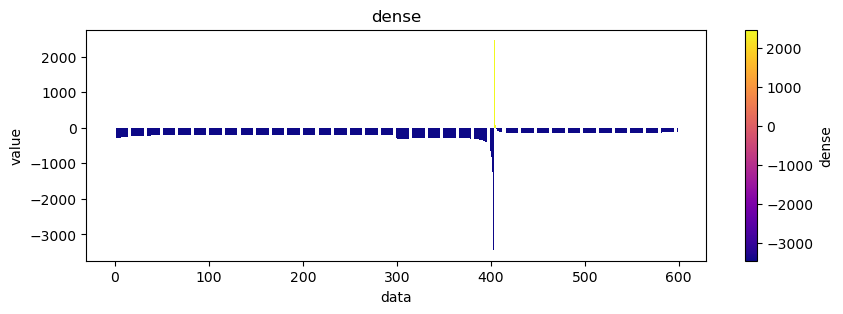

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 创建示例数据
data = intercept_array

# 计算颜色映射值
colors = cm.plasma(data)

# 绘制条形图，并根据颜色映射值设置颜色
plt.figure(figsize=(10, 3))
#plt.bar(range(len(data)), height=data, color=colors)
plt.bar(range(len(data)), height=data, color=colors)

plt.title('dense')
plt.xlabel('data')
plt.ylabel('value')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma')
sm.set_array(data)
cbar = plt.colorbar(sm)
cbar.set_label('dense')

plt.show()


In [195]:
def find_minimal_interval(arr):
    arr.sort()  # 先对数组进行排序
    #min_count = float('inf')  # 初始化最小个数为正无穷大

    max_count = 0
    optimal_interval = []
    position = 0

    for i in range(round(arr[0]),round(arr[-1]-20)):
        current_interval = []
        for j in range(len(arr)):
            if (i + 20 > arr[j] and i < arr[j]):
                current_interval.append(arr[j])
                j = j + 1
        count = len(current_interval)

        if count > max_count:
            max_count = count
            optimal_interval = current_interval
            position = i


    print("最da个数的区间：[", position, ",", position + 20, "] 个数：", max_count)
    return optimal_interval

# 示例用法
my_array = intercept_array
result = find_minimal_interval(my_array)
print("最da个数的区间：", result)


最da个数的区间：[ -211 , -191 ] 个数： 255
最da个数的区间： [-210.9316490349782, -210.3004445699012, -209.68965335410078, -209.09844231575607, -208.52602358523828, -207.97165147816312, -207.43461971687265, -206.9142588686421, -206.4099339811467, -205.9210423976861, -205.44701173642673, -204.9872980194691, -204.54138393894033, -204.12958852979176, -204.10877724854123, -203.98168012350712, -203.83446067555553, -203.68900927008588, -203.68793155379453, -203.54209414766362, -203.39694986854406, -203.28163350555351, -203.2525001501266, -203.10874644878612, -202.96569024396422, -202.88622434605503, -202.82333303855916, -202.68167635932394, -202.5407217572722, -202.50237586991193, -202.40047080809234, -202.26092511257073, -202.1297007227501, -202.12208629702243, -201.98395601373178, -201.8465359414013, -201.76782907315325, -201.70982778561032, -201.57383327928284, -201.43855418316514, -201.41640763799307, -201.30399228631327, -201.17014940659098, -201.07509877207343, -201.03702739117728, -200.90462811708562, 

Line 300 - Endpoints: ((251.89970830693642, -162.93119722619133), (252.44141231337693, -162.09062791351909))



Line 300 - Midpoint: (-252.17056031015667, -162.5109125698552)
Line 300 - Endpoints: ((-252.44141231337693, -162.09062791351909), (-251.89970830693642, -162.93119722619133))
Line 300 - Slope: -1.551713302243349
Line 300 - intercept: -553.807325437284